In [134]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [135]:
df = pd.read_csv("/kaggle/input/heartdata/heart.csv")

In [136]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [137]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [139]:
df.isnull().sum()# to find the number of missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

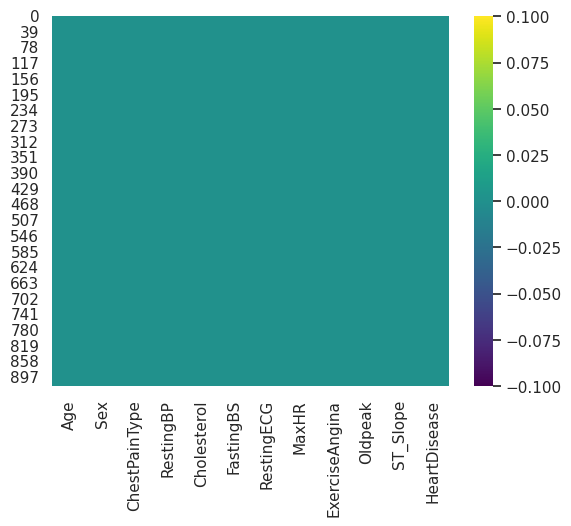

In [140]:
sns.heatmap(df.isnull(), cmap = 'viridis') #to create a heatmap to visualize missing values in a DataFrame

## Label Encoding

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #utility class helps categorical text data into numerical values.
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [142]:
df['Oldpeak'] = le.fit_transform(df['Oldpeak'])

In [143]:
df.head() #display first few rows of the modified dataframe.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,10,2,0
1,49,0,2,160,180,0,1,156,0,20,1,1
2,37,1,1,130,283,0,2,98,0,10,2,0
3,48,0,0,138,214,0,1,108,1,25,1,1
4,54,1,2,150,195,0,1,122,0,10,2,0


In [144]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms = MinMaxScaler()
scaler = StandardScaler()# used to transform the specified columns in the Dataframe
# remove mean and sclae to unit variance

In [145]:
df['Age'] = scaler.fit_transform(df[['Age']])
df['RestingBP'] = scaler.fit_transform(df[['RestingBP']])
df['Cholesterol'] = scaler.fit_transform(df[['Cholesterol']])
df['MaxHR'] = scaler.fit_transform(df[['MaxHR']])

In [146]:
df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])

In [147]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.192308,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.384615,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.192308,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.480769,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.192308,2,0


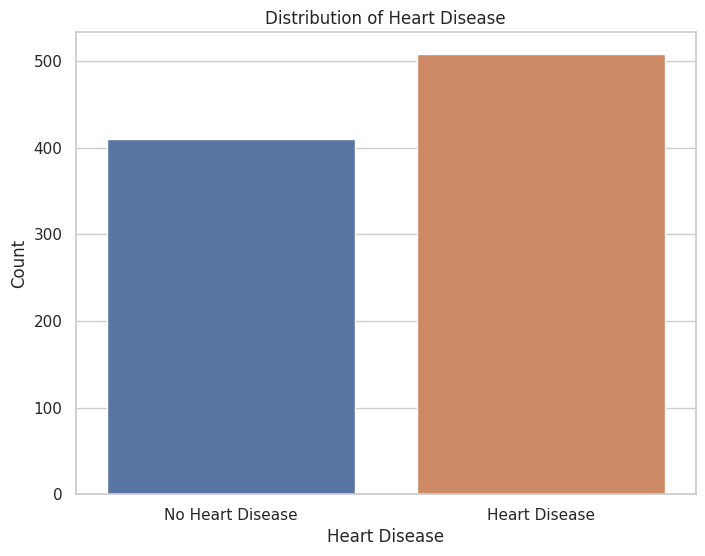

In [148]:
sns.set(style="whitegrid")

# Visualization : Countplot for Heart Disease distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

# MODELING THE DATA

In [149]:
# Separating features (independent variables) from the target variable
X = df.drop('HeartDisease',axis=1)

# Storing the target variable in a separate variable
y = df['HeartDisease']

In [150]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [151]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)

# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression


In [153]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [154]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


Precision :  0.8598726114649682
Recall :  0.9121621621621622
F1 Score :  0.8852459016393441
-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8731884057971014
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[106  22]
 [ 13 135]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
-------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       128
           1       0.86      0.91      0.89       148

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



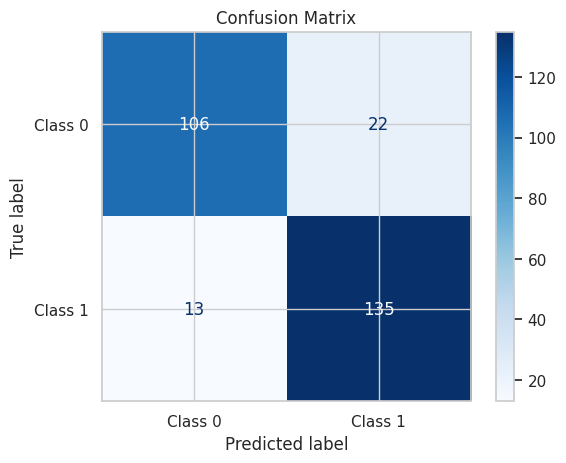

In [155]:
y_pred = model.predict(X_test)
print("Precision : ", precision_score(y_test, y_pred, average = 'binary'))
print("Recall : ", recall_score(y_test, y_pred, average = 'binary'))
print("F1 Score : ", f1_score(y_test, y_pred, average = 'binary'))
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> ")
print("-------------------------------------")
print(f"{classification_report(y_test,y_pred)}")

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [156]:
from sklearn.svm import SVC

In [157]:
model = SVC()
model.fit(X_train,y_train)

SVC()

Precision :  0.8553459119496856
Recall :  0.918918918918919
F1 Score :  0.8859934853420196
-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8731884057971014
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[105  23]
 [ 12 136]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
-------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       128
           1       0.86      0.92      0.89       148

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



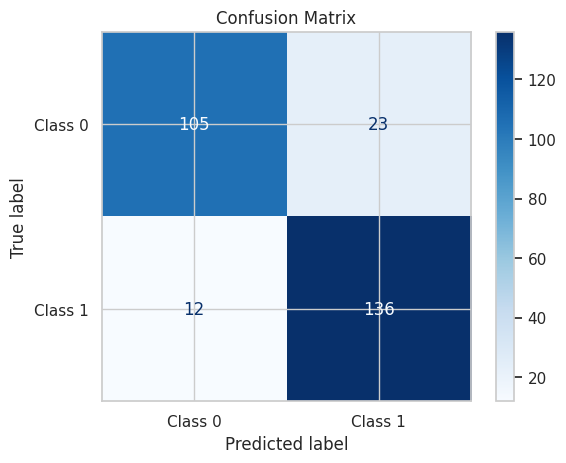

In [158]:
y_pred = model.predict(X_test)
print("Precision : ", precision_score(y_test, y_pred, average = 'binary'))
print("Recall : ", recall_score(y_test, y_pred, average = 'binary'))
print("F1 Score : ", f1_score(y_test, y_pred, average = 'binary'))
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> ")
print("-------------------------------------")
print(f"{classification_report(y_test,y_pred)}")

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [159]:
from sklearn.naive_bayes import GaussianNB

In [160]:
# Creating a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

GaussianNB()

Precision :  0.8553459119496856
Recall :  0.918918918918919
F1 Score :  0.8859934853420196
-------------------------------------------------------------------------
The accuracy score is: ------>>  0.8623188405797102
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[106  22]
 [ 16 132]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
-------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       128
           1       0.86      0.89      0.87       148

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



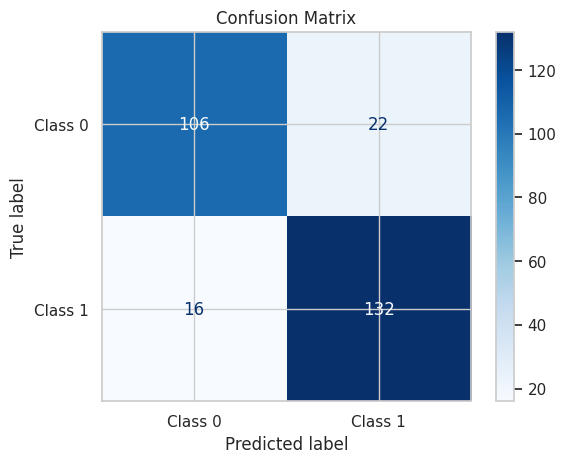

In [161]:
# Making predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluating the Naive Bayes model
print("Precision : ", precision_score(y_test, y_pred, average = 'binary'))
print("Recall : ", recall_score(y_test, y_pred, average = 'binary'))
print("F1 Score : ", f1_score(y_test, y_pred, average = 'binary'))
print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy_score(y_test, y_pred_nb)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test, y_pred_nb)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> ")
print("-------------------------------------")
print(f"{classification_report(y_test, y_pred_nb)}")

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning

In [162]:

from sklearn.model_selection import GridSearchCV
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

### SVM

In [163]:
# Defining the parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create the GridSearchCV object
grid_svm = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)

# Fit the grid search to the data
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [164]:
svm_params = grid_svm.best_params_
svm = SVC(**svm_params)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"The best hyperparameters are: {svm_params}")
print("Accuracy Score:", score)
new_row = {"Model": "SVC", "Accuracy Score": score}
tuned_models = pd.concat([tuned_models, pd.DataFrame([new_row])], ignore_index=True)

The best hyperparameters are: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy Score: 0.8840579710144928


### Logistic Regression

In [165]:
# Defining the parameter grid for Logistic Regression
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

# Instantiate GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring="accuracy", cv=5, verbose=0)

# Fit the model to the training data
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [166]:
lr_params = grid_lr.best_params_
lr = LogisticRegression(**lr_params)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"The best hyperparameters are: {lr_params}")
print("Accuracy Score:", score)
new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
tuned_models = pd.concat([tuned_models, pd.DataFrame([new_row])], ignore_index=True)

The best hyperparameters are: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy Score: 0.8659420289855072


### Naive Bayes

In [167]:
# Defining the parameter grid for Naive Bayes
param_grid_nb = {
    # There are no specific hyperparameters to tune for Gaussian Naive Bayes
}

# Instantiate GridSearchCV
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='accuracy', cv=5, verbose=0)

# Fit the model to the training data
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid={}, scoring='accuracy')

In [168]:
nb_params = grid_nb.best_params_
nb = GaussianNB(**nb_params)
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"The best hyperparameters are: {nb_params}")
print("Accuracy Score:", score)
new_row = {"Model": "GaussianNB", "Accuracy Score": score}
tuned_models = pd.concat([tuned_models, pd.DataFrame([new_row])], ignore_index=True)

The best hyperparameters are: {}
Accuracy Score: 0.8623188405797102
